In [ ]:
# Download dataset
# !gdown  1qz8CrCSSSOWhD38rmlNE1zoTVb-CHh6C
# !gdown  1yKyKgxcnGMIAnA_6Vr2ilbpHMc9COg-v
# !gdown  107FTosYIeBn5QbynR46YG91nHcJ70whs
# !gdown  1hSMUMj5IRpf-nQs1OwgiQLmGZCN0KDWl
# !git clone https://github.com/barnrang/Prototypical-network-keras-reimplementation
# !mkdir /content/Prototypical-network-keras-reimplementation/python/images
# !mv /content/test.tar /content/Prototypical-network-keras-reimplementation/python
# !mv /content/train.tar /content/Prototypical-network-keras-reimplementation/python
# !mv /content/val.tar /content/Prototypical-network-keras-reimplementation/python
# !tar -xf /content/Prototypical-network-keras-reimplementation/python/test.tar -C /content/Prototypical-network-keras-reimplementation/python/images
# !tar -xf /content/Prototypical-network-keras-reimplementation/python/train.tar -C /content/Prototypical-network-keras-reimplementation/python/images
# !tar -xf /content/Prototypical-network-keras-reimplementation/python/val.tar -C /content/Prototypical-network-keras-reimplementation/python/images

In [5]:
import os, shutil
project_path=os.getcwd()
os.getcwd()

'C:\\Users\\User7\\Desktop\\fault detection FSL'

In [3]:
import os, shutil
import pandas as pd
project_path=os.getcwd()
# make images in python directory
try:
    os.mkdir( 'images' )
except OSError as error:
    print('Directory exist!')
    
path00=os.path.join(project_path,'images')
path10=os.path.join(project_path,'train')
path20=os.path.join(project_path,'valid')

train_files=[]
train_labels=[]
ct=0
for dn in os.listdir(path10):
  f_list=os.listdir(path10 + '/' + dn)
  for fn in f_list:
    shutil.move(path10 +'/' + dn + '/' +fn , path00 + '/ecgtrain'+str(ct) +fn)
    train_files.append('ecgtrain'+str(ct) +fn)
    train_labels.append(dn)
    ct=ct+1
    
valid_files=[]
valid_labels=[]
ct=0
for dn in os.listdir(path20):
  f_list=os.listdir(path20 + '/' + dn)
  for fn in f_list:
    shutil.move(path20 +'/' + dn + '/' +fn , path00 + '/ecgvalid'+str(ct) +fn)
    valid_files.append('ecgvalid'+str(ct) +fn)
    valid_labels.append(dn)
    ct=ct+1

    
mydf=[]
mydf = pd.DataFrame({'filename': train_files, 'label': train_labels})
mydf.to_csv('train.csv', index=False)
mydf=[]
mydf = pd.DataFrame({'filename': valid_files, 'label': valid_labels})
mydf.to_csv('val.csv', index=False)

In [4]:
import os, shutil
project_path=os.getcwd()
# git_path=os.path.join(project_path,'Prototypical-network-keras-reimplementation')
# path0=os.path.join(git_path,'python','images0')
# path1=os.path.join(path0,'test')
# path2=os.path.join(path0,'train')
# path3=os.path.join(path0,'val')

# make images in python directory
# try:
#     os.mkdir( path0 )
# except OSError as error:
#     print('Directory exist!')

# print(project_path)
# print(git_path)
# print(path0)
# print('Number of classes of test set is: ',len(os.listdir(path1)))
# print('Number of classes of train set is: ',len(os.listdir(path2)))
# print('Number of classes of val set is: ',len(os.listdir(path3)))

In [62]:
os.getcwd()

'C:\\Users\\User7\\Desktop\\fault detection FSL'

In [98]:
import os, shutil
path0=os.path.join(project_path,'myimages')
path1=os.path.join(project_path,'test')
path2=os.path.join(project_path,'train')
path3=os.path.join(project_path,'valid')

# make images in python directory
try:
    os.mkdir( 'myimages' )
except OSError as error:
    print('Directory exist!')

# for dn in os.listdir(path1):
f_list=os.listdir(path1)
for fn in f_list:
    shutil.move(path1 +'/' +fn , path0 + '/' +fn)

for dn in os.listdir(path2):
  f_list=os.listdir(path2 + '/' + dn)
  for fn in f_list:
    shutil.move(path2 +'/' + dn + '/' +fn , path0 + '/' +fn)

for dn in os.listdir(path3):
  f_list=os.listdir(path3 + '/' + dn)
  for fn in f_list:
    shutil.move(path3 +'/' + dn + '/' +fn , path0 + '/' +fn)

Directory exist!


In [28]:
import os, shutil
os.chdir(os.path.join(git_path,'python'))
!python dataloader_mini.py
# os.getcwd()
# os.chdir(git_path)
# !python mini_proto_train.py --train_way 30 --train_query 20 --val_way 5 --shot 5 --gpu 0
# !python mini_proto_train.py

In [4]:
#Meta-Learning
import argparse
import os
os.chdir(git_path)

# def parser():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--train_way', dest='train_way', type=int, default=30)
#     parser.add_argument('--train_query', dest='train_query', type=int, default=15)
#     parser.add_argument('--val_way', dest='val_way', type=int, default=5)
#     parser.add_argument('--shot', dest='shot', type=int, default=1)

#     return parser.parse_args()

# args = parser()


from tensorflow.keras import callbacks as cb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, save_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers as rg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import backend as K


import numpy.random as rng

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from python.dataloader import loader
from mini_protoloader import DataGenerator
from mini_proto_model import conv_net, hinge_loss, l2_distance, acc, l1_distance
#from transform import transform_gate
from util.tensor_op import *
from util.loss import *
input_shape = (None,384,384,3)
batch_size = 32
train_way = 4
train_query = 4
val_way = 4
shot = 10
lr = 0.002

def scheduler(epoch):
    global lr
    if epoch % 15 == 0:
        lr /= 2
    return lr

class SaveConv(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            save_model(conv, f"model/miniimage_conv_{epoch}_{shot}_{val_way}")


conv = conv_net()
sample = Input(input_shape)
conv_5d = TimeDistributed(conv)
out_feature = conv_5d(sample)
out_feature = Lambda(reduce_tensor)(out_feature)
inp = Input(input_shape)
map_feature = conv_5d(inp)
map_feature = Lambda(reshape_query)(map_feature)
pred = Lambda(proto_dist)([out_feature, map_feature]) #negative distance
combine = Model([sample, inp], pred)

optimizer = Adam(0.001)
combine.compile(loss='categorical_crossentropy', optimizer=optimizer,
    metrics=['categorical_accuracy'])

train_loader = DataGenerator(way=train_way, query=train_query, shot=shot, num_batch=100)
val_loader = DataGenerator(data_type='val',way=val_way, shot=shot)
test_loader = DataGenerator(data_type='test',way=val_way, shot=shot, num_batch=100)

save_conv = SaveConv()
reduce_lr = cb.ReduceLROnPlateau(monitor='val_loss', factor=0.4,patience=2, min_lr=1e-8)
lr_sched = cb.LearningRateScheduler(scheduler)
tensorboard = cb.TensorBoard()


combine.fit(train_loader,epochs=300,validation_data=val_loader,
    shuffle=False,
    callbacks=[save_conv, lr_sched, tensorboard])
combine.evaluate(test_loader)

save_model(conv, "model/miniimage_conv_{epoch}_{shot}_{val_way}")
combine.evaluate(test_loader)

Epoch 1/300
100/100 [==============================] - 50s 463ms/step - loss: 2.1973 - categorical_accuracy: 0.3219 - val_loss: 1.4555 - val_categorical_accuracy: 0.2578
INFO:tensorflow:Assets written to: model/miniimage_conv_0_10_4\assets
Epoch 2/300
100/100 [==============================] - 45s 449ms/step - loss: 1.1324 - categorical_accuracy: 0.4412 - val_loss: 1.4292 - val_categorical_accuracy: 0.3047
Epoch 3/300
100/100 [==============================] - 45s 450ms/step - loss: 0.9982 - categorical_accuracy: 0.5406 - val_loss: 1.4357 - val_categorical_accuracy: 0.3203
Epoch 4/300
100/100 [==============================] - 45s 449ms/step - loss: 0.7098 - categorical_accuracy: 0.7088 - val_loss: 1.3141 - val_categorical_accuracy: 0.4062
Epoch 5/300
100/100 [==============================] - 45s 449ms/step - loss: 0.3944 - categorical_accuracy: 0.8525 - val_loss: 1.5356 - val_categorical_accuracy: 0.3418
Epoch 6/300
100/100 [==============================] - 45s 449ms/step - loss: 0.

INFO:tensorflow:Assets written to: model/miniimage_conv_35_10_4\assets
Epoch 37/300
100/100 [==============================] - 45s 448ms/step - loss: 7.1279e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9904 - val_categorical_accuracy: 0.4785
Epoch 38/300
100/100 [==============================] - 45s 449ms/step - loss: 7.0206e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9645 - val_categorical_accuracy: 0.4805
Epoch 39/300
100/100 [==============================] - 45s 448ms/step - loss: 6.3944e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9915 - val_categorical_accuracy: 0.4668
Epoch 40/300
100/100 [==============================] - 45s 449ms/step - loss: 6.9171e-05 - categorical_accuracy: 1.0000 - val_loss: 1.9156 - val_categorical_accuracy: 0.4727
Epoch 41/300
100/100 [==============================] - 45s 449ms/step - loss: 5.1958e-05 - categorical_accuracy: 1.0000 - val_loss: 1.8993 - val_categorical_accuracy: 0.4824
INFO:tensorflow:Assets written to: model/miniimage_con

KeyboardInterrupt: 

In [3]:
# test model
import argparse
import os
os.chdir(git_path)
# def parser():
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--test_way', dest='test_way', type=int, default=5)
#     parser.add_argument('--shot', dest='shot', type=int, default=1)
#     parser.add_argument('--gpu', dest='gpu', type=int, default=0)
#     parser.add_argument('--model', dest='model')

#     return parser.parse_args()

# args = parser()
os.environ["CUDA_VISIBLE_DEVICES"]='1'

from tensorflow.keras import callbacks as cb
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model, save_model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers as rg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import backend as K


import numpy.random as rng

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from python.dataloader import loader
from mini_protoloader import DataGenerator
from mini_proto_model import conv_net, hinge_loss, l2_distance, acc, l1_distance
#from transform import transform_gate
from util.tensor_op import *
from util.loss import *
input_shape = (None,384,384,3)
batch_size = 32
test_way = 4
shot = 5
model_path = "model/miniimage_conv_55_10_4"
lr = 0.002

def scheduler(epoch):
    global lr
    if epoch % 15 == 0:
        lr /= 2
    return lr

class SaveConv(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            save_model(conv, f"model/miniimage_conv_{epoch}_{shot}_{val_way}")


if __name__ == "__main__":
    #conv = conv_net()
    conv = load_model(model_path)
    sample = Input(input_shape)
    conv_5d = TimeDistributed(conv)
    out_feature = conv_5d(sample)
    out_feature = Lambda(reduce_tensor)(out_feature)
    inp = Input(input_shape)
    map_feature = conv_5d(inp)
    map_feature = Lambda(reshape_query)(map_feature)
    pred = Lambda(proto_dist)([out_feature, map_feature]) #negative distance
    combine = Model([sample, inp], pred)

    optimizer = Adam(0.001)
    combine.compile(loss='categorical_crossentropy', optimizer=optimizer,
        metrics=['categorical_accuracy'])
    test_loader = DataGenerator(data_type='test',way=test_way, shot=shot, num_batch=32)
    #train_loader = DataGenerator(way=4, query=8, shot=40, num_batch=100)

    combine.evaluate(test_loader)


32/32 [==============================] - 29s 882ms/step - loss: 2.8109 - categorical_accuracy: 0.4863


In [1]:
# import main Libraries
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os, shutil
import random
from scipy import signal
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [10]:
#Reading Data from CSV file
df = pd.read_csv (os.path.join(project_path,'fault dataset.csv'))
df_np=df.to_numpy()
print(df_np.shape)
df

(606528, 6)


,T,A,I,v,p,Class Label
0,10,50,0.896410,16.807684,15.066573,0
1,10,50,0.915625,1.000862,0.916414,0
2,10,50,0.915574,2.000809,1.831887,0
3,10,50,0.915522,3.000755,2.747259,0
4,10,50,0.915471,4.000702,3.662528,0
...,...,...,...,...,...,...
606523,50,1200,-0.000001,345.981547,-0.000432,3
606524,50,1200,-0.000001,346.981494,-0.000434,3
606525,50,1200,-0.000001,347.981441,-0.000435,3
606526,50,1200,-0.000001,348.981387,-0.000436,3


In [11]:
# print titles and shape
print(df.columns)
x=df_np[0:,0:]
print('x shape:',x.shape)
# Data Description
df.describe()

Index(['T', 'A', 'I', 'v', 'p', 'Class Label'], dtype='object')
x shape: (606528, 6)


,T,A,I,v,p,Class Label
count,606528.000000,606528.000000,606528.000000,606528.000000,606528.000000,606528.000000
mean,30.000000,625.000000,8.963909,175.559954,1349.924254,2.000000
std,12.909955,346.109613,6.796771,101.098589,1345.588719,1.118035
min,10.000000,50.000000,-0.000002,1.000252,-0.000761,0.000000
25%,20.000000,337.500000,2.828402,88.005323,239.707981,1.000000
50%,30.000000,625.000000,7.610000,175.990983,913.373946,2.500000
75%,40.000000,912.500000,14.684600,262.995873,2112.511892,3.000000
max,50.000000,1200.000000,22.917167,421.557215,9477.892555,3.000000


In [8]:
# Adding Noise
mu,sigma_I=0,.5
mu,sigma_V=0,10
s_I=np.random.normal(mu,sigma_I,606528)
s_V=np.random.normal(mu,sigma_V,606528)
x[:,2]=x[:,2]+s_I
x[:,3]=x[:,3]+s_V
df['I']=x[:,2]
df['v']=x[:,3]

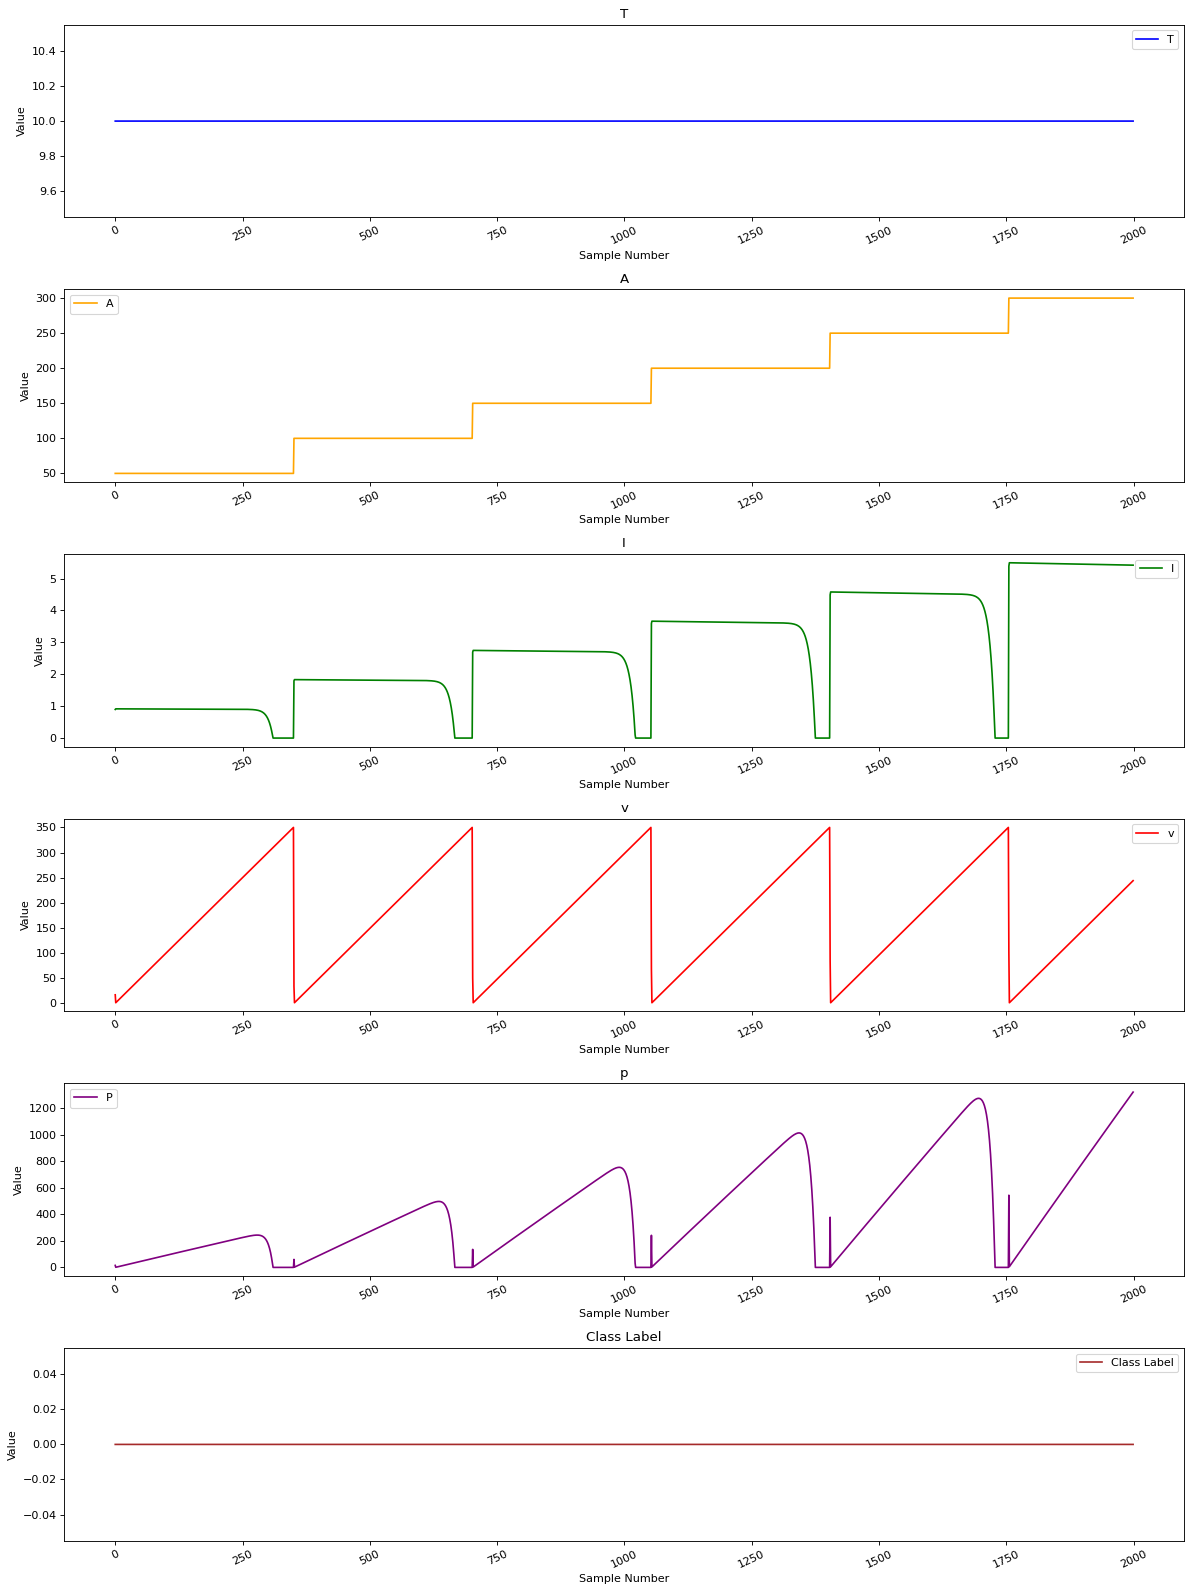

In [12]:
# Data Visualization
titles = [
    "T",
    "A",
    "I",
    "v",
    "P",
    "Class Label",
]

feature_keys = [
    "T",
    "A",
    "I",
    "v",
    "p",
    "Class Label",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
]

date_time_key = ""


def show_raw_visualization(data):
    # time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=6, ncols=1, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i],
            color=c,
            title="{}".format(key),
            rot=25,
            xlabel='Sample Number',
            ylabel='Value'
        )

        ax.legend([titles[i]])
        
    plt.tight_layout()
  


show_raw_visualization(df[0:2000])


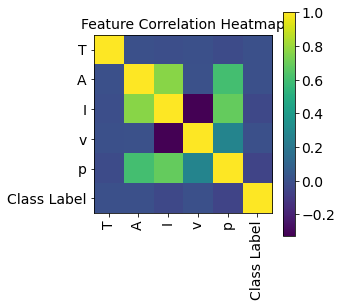

In [13]:
# This heat map shows the correlation between different features
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [14]:
#normalizing Data
x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled

,0,1,2,3,4,5
0,0.0,0.0,3.911530e-02,0.037587,1.589734e-03,0.0
1,0.0,0.0,3.995374e-02,0.000001,9.676986e-05,0.0
2,0.0,0.0,3.995152e-02,0.002379,1.933603e-04,0.0
3,0.0,0.0,3.994929e-02,0.004757,2.899399e-04,0.0
4,0.0,0.0,3.994706e-02,0.007134,3.865088e-04,0.0
...,...,...,...,...,...,...
606523,1.0,1.0,4.058093e-08,0.820296,3.462858e-08,1.0
606524,1.0,1.0,4.058093e-08,0.822674,3.449670e-08,1.0
606525,1.0,1.0,4.058093e-08,0.825052,3.436481e-08,1.0
606526,1.0,1.0,4.058093e-08,0.827429,3.423303e-08,1.0


In [15]:
x_scaled[0,5]

0.0

In [16]:
# dataframe to batches
batch=[]
label=[]
features=[]
y=[]
L=len(x[:,-1])
cnt=0
for i in range(int(L/351)):
  batch=x_scaled[cnt:cnt+351,0:5]
  label=x[cnt:cnt+351,5]
  features.append(batch)
  y.append(int(sum(label)/351))
  cnt=cnt+351

# shuffling data
rnd_seed=42
random.seed(rnd_seed)
random.shuffle(features)
random.seed(rnd_seed)
random.shuffle(y)

# print(y)
# print(features[0])

In [17]:
#split data
# 80% for train 10% for validation and 10% for test
train=features[0:1384]
y_train=y[0:1384]

valid=features[1384:1556]
y_valid=y[1384:1556]

test=features[1556:1728]
y_test=y[1556:1728]

print('Number of train data is: ',len(train))
print('Number of validation data is: ',len(valid))
print('Number of test data is: ',len(test))

Number of train data is:  1384
Number of validation data is:  172
Number of test data is:  172


(351,)
1


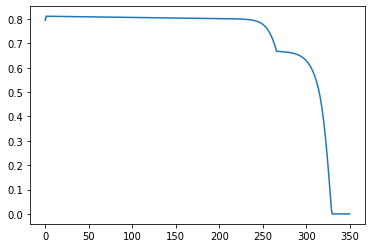

In [18]:
# Plot a sample and its label
num=45
feature_number=2
print(train[num][:,feature_number].shape)
plt.plot(train[num][:,feature_number])
print(y_train[num])

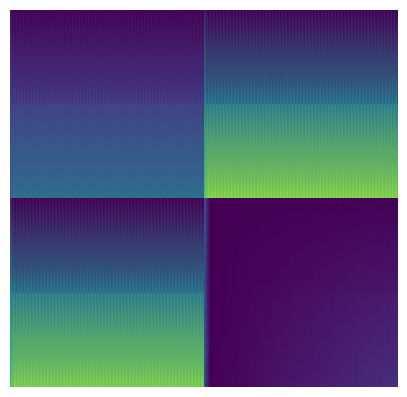

<Figure size 256x256 with 0 Axes>

In [93]:
# Calculating the STFT of a sample and ploting its STFT Magnitue
feature_number=0
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
Zxx=Zxx[0:6,0:60]
# print(Zxx.shape)
fig = plt.figure(figsize=(5,5),dpi=100)
plt.subplot(2, 2, 1)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=1
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
Zxx=Zxx[0:6,0:60]
# print(Zxx.shape)
plt.subplot(2, 2, 2)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=2
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
Zxx=Zxx[0:6,0:60]
# print(Zxx.shape)
plt.subplot(2, 2, 3)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=3
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
Zxx=Zxx[0:6,0:60]
# print(Zxx.shape)
plt.subplot(2, 2, 4)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

plt.subplots_adjust(hspace = 0,wspace=0)
# plt.figure(figsize=(2.56,2.56),dpi=100)

plt.figure(figsize=(2.56,2.56),dpi=100)

# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.axis('off')
plt.show()
fig.savefig('test.png',bbox_inches='tight',pad_inches=0)

# plt.savefig('test.png',bbox_inches='tight',pad_inches=0)
plt.close()
# print(Zxx.shape)

In [94]:
# define function converting signal to 2x2 image
# batch is a 351x5 array
def batch2stft(batch,filename='mytest.jpg'):
  f1,f2,f3,f4,f5=0,1,2,3,4   # feature numbers
  fs=360
  fig = plt.figure(figsize=(5,5),dpi=100)
  
  x=batch[:,f1]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 1)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f2]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 2)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f3]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 3)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f4]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=5,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 4)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  # plt.figure(figsize=(2.56,2.56),dpi=100)
  plt.subplots_adjust(hspace = 0,wspace=0)
  # plt.show()
  fig.savefig(filename, bbox_inches='tight',pad_inches=0)

  plt.close()

  return

# batch2stft(train[7],filename='test/mytest01.jpg')

In [48]:
# making folders for writing stft images in a train and valid folder
# shutil.rmtree('train')
# shutil.rmtree('valid')
os.mkdir('train')
os.mkdir('valid')
os.mkdir('test')

os.mkdir('train/class0')
os.mkdir('train/class1')
os.mkdir('train/class2')
os.mkdir('train/class3')

os.mkdir('valid/class0')
os.mkdir('valid/class1')
os.mkdir('valid/class2')
os.mkdir('valid/class3')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'train'

In [95]:
# savig STFT images
train_files=[]
valid_files=[]
test_files=[]
train_labels=[]
valid_labels=[]
test_labels=[]

# train images
npc=50 # Number per class
c1=c2=c3=c4=0
for i in range(len(train)):
  if y_train[i]==0 and c1<npc:
    batch2stft(train[i],filename='train/class0/' + 'train_' + str(i) + '.jpg')
    train_files.append( 'train_' + str(i) + '.jpg' )
    train_labels.append('class_' + str(y_train[i]))
    c1=c1+1

  elif y_train[i]==1 and c2<npc:
    batch2stft(train[i],filename='train/class1/' + 'train_' + str(i) + '.jpg')
    train_files.append( 'train_' + str(i) + '.jpg' )
    train_labels.append('class_' + str(y_train[i]))
    c2=c2+1

  elif y_train[i]==2 and c3<npc:
    batch2stft(train[i],filename='train/class2/' + 'train_' + str(i) + '.jpg')
    train_files.append( 'train_' + str(i) + '.jpg' )
    train_labels.append('class_' + str(y_train[i]))
    c3=c3+1

  elif y_train[i]==3 and c4<npc:
    batch2stft(train[i],filename='train/class3/' + 'train_' + str(i) + '.jpg')
    train_files.append( 'train_' + str(i) + '.jpg' )
    train_labels.append('class_' + str(y_train[i]))
    c4=c4+1
print('Number per class for train set: ',c1,c2,c3,c4)

# valid images
npc=14 # Number per class
c1=c2=c3=c4=0
for i in range(len(valid)):
  if y_valid[i]==0 and c1<npc:
    batch2stft(valid[i],filename='valid/class0/' + 'valid_' + str(i) + '.jpg')
    valid_files.append( 'valid_' + str(i) + '.jpg' )
    valid_labels.append('class_' + str(y_valid[i]))
    c1=c1+1

  elif y_valid[i]==1 and c2<npc:
    batch2stft(valid[i],filename='valid/class1/' + 'valid_' + str(i) + '.jpg')
    valid_files.append( 'valid_' + str(i) + '.jpg' )
    valid_labels.append('class_' + str(y_valid[i]))
    c2=c2+1

  elif y_valid[i]==2 and c3<npc:
    batch2stft(valid[i],filename='valid/class2/' + 'valid_' + str(i) + '.jpg')
    valid_files.append( 'valid_' + str(i) + '.jpg' )
    valid_labels.append('class_' + str(y_valid[i]))
    c3=c3+1

  elif y_valid[i]==3 and c4<npc:
    batch2stft(valid[i],filename='valid/class3/' + 'valid_' + str(i) + '.jpg')
    valid_files.append( 'valid_' + str(i) + '.jpg' )
    valid_labels.append('class_' + str(y_valid[i]))
    c4=c4+1
print('Number per class for valid set: ',c1,c2,c3,c4)

# test images
npc=19 # Number per class
c1=c2=c3=c4=0
for i in range(len(test)):
  if y_test[i]==0 and c1<npc:
    batch2stft(test[i],filename='test/' + 'test_' + str(i) + '.jpg')
    test_files.append('test_' + str(i) + '.jpg')
    test_labels.append('class_' + str(y_test[i]))
    c1=c1+1

  if y_test[i]==1 and c2<npc:
    batch2stft(test[i],filename='test/' + 'test_' + str(i) + '.jpg')
    test_files.append('test_' + str(i) + '.jpg')
    test_labels.append('class_' + str(y_test[i]))
    c2=c2+1 

  if y_test[i]==2 and c3<npc:
    batch2stft(test[i],filename='test/' + 'test_' + str(i) + '.jpg')
    test_files.append('test_' + str(i) + '.jpg')
    test_labels.append('class_' + str(y_test[i]))
    c3=c3+1

  if y_test[i]==3 and c4<npc:
    batch2stft(test[i],filename='test/' + 'test_' + str(i) + '.jpg')
    test_files.append('test_' + str(i) + '.jpg')
    test_labels.append('class_' + str(y_test[i]))
    c4=c4+1

print('Number per class for test set: ',c1,c2,c3,c4)

Number per class for train set:  50 50 50 50
Number per class for valid set:  14 14 14 14
Number per class for test set:  19 19 19 19


In [96]:
# Define class path for train and valid images
import os
train_class0_path='train/class0'
train_class1_path='train/class1'
train_class2_path='train/class2'
train_class3_path='train/class3'

valid_class0_path='valid/class0'
valid_class1_path='valid/class1'
valid_class2_path='valid/class2'
valid_class3_path='valid/class3'

train_class0_names = os.listdir(train_class0_path)
train_class1_names = os.listdir(train_class1_path)
train_class2_names = os.listdir(train_class2_path)
train_class3_names = os.listdir(train_class3_path)
                                                                
valid_class0_names = os.listdir(valid_class0_path)
valid_class1_names = os.listdir(valid_class1_path)
valid_class2_names = os.listdir(valid_class2_path)
valid_class3_names = os.listdir(valid_class3_path)

# Display the number of images of each class
print('total training class0 images:', len(os.listdir(train_class0_path)))
print('total training class1 images:', len(os.listdir(train_class1_path)))
print('total training class2 images:', len(os.listdir(train_class2_path)))
print('total training class3 images:', len(os.listdir(train_class3_path)))

print('total validation class0 images:', len(os.listdir(valid_class0_path)))
print('total validation class1 images:', len(os.listdir(valid_class1_path)))
print('total validation class2 images:', len(os.listdir(valid_class2_path)))
print('total validation class3 images:', len(os.listdir(valid_class3_path)))

total training class0 images: 50
total training class1 images: 50
total training class2 images: 50
total training class3 images: 50
total validation class0 images: 14
total validation class1 images: 14
total validation class2 images: 14
total validation class3 images: 14


In [97]:
try:
    os.mkdir('myimages')
except OSError as error:
    print('Directory exist!')

mydf=[]
mydf = pd.DataFrame({'filename': test_files, 'label': test_labels})
mydf.to_csv('test.csv', index=False)
mydf=[]
mydf = pd.DataFrame({'filename': train_files, 'label': train_labels})
mydf.to_csv('train.csv', index=False)
mydf=[]
mydf = pd.DataFrame({'filename': valid_files, 'label': valid_labels})
mydf.to_csv('val.csv', index=False)

# shutil.copytree('test','myimages/test')
# shutil.copytree('train','myimages/train')
# shutil.copytree('valid','myimages/valid')
# os.rename('myimages/valid' , 'myimages/val' )

# os.rename(os.path.join(git_path,'python','test.csv') , os.path.join(git_path,'python','test0.csv') )
# os.rename(os.path.join(git_path,'python','train.csv'), os.path.join(git_path,'python','train0.csv') )
# os.rename(os.path.join(git_path,'python','val.csv') , os.path.join(git_path,'python','val0.csv') )
# shutil.move('test.csv',os.path.join(git_path,'python'))
# shutil.move('train.csv',os.path.join(git_path,'python'))
# shutil.move('val.csv',os.path.join(git_path,'python'))

# os.rename(os.path.join(git_path,'python','images'), os.path.join(git_path,'python','images0') )
# shutil.move('myimages',os.path.join(git_path,'python','images') )

In [22]:
import os, shutil
project_path=os.getcwd()
git_path=os.path.join(project_path,'Prototypical-network-keras-reimplementation')
path0=os.path.join(git_path,'python','images')
path1=os.path.join(path0,'test')
path2=os.path.join(path0,'train')
path3=os.path.join(path0,'val')

for fn in os.listdir(path1):
  shutil.move(path1 +'/' + fn , path0 + '/' +fn)

for dn in os.listdir(path2):
  f_list=os.listdir(path2 + '/' + dn)
  for fn in f_list:
    shutil.move(path2 +'/' + dn + '/' +fn , path0 + '/' +fn)

for dn in os.listdir(path3):
  f_list=os.listdir(path3 + '/' + dn)
  for fn in f_list:
    shutil.move(path3 +'/' + dn + '/' +fn , path0 + '/' +fn)

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 3

# Index for iterating over images
pic_index = 0

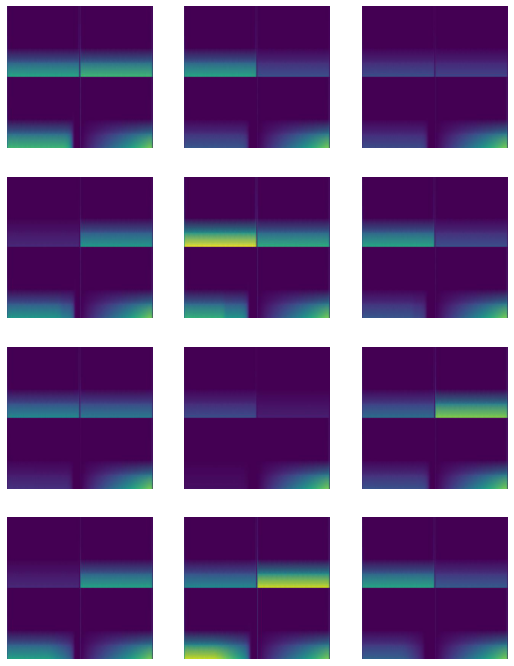

In [19]:
# Displaying STFT images Prepared for Training
# Set up matplotlib fig, and size it to fit 5x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3 , nrows * 3)

pic_index =+ 3
next_class0_pic = [os.path.join(train_class0_path, fname) 
                for fname in train_class0_names[pic_index-3:pic_index]]
next_class1_pic = [os.path.join(train_class1_path, fname) 
                for fname in train_class1_names[pic_index-3:pic_index]]
next_class2_pic = [os.path.join(train_class2_path, fname) 
                for fname in train_class2_names[pic_index-3:pic_index]]
next_class3_pic = [os.path.join(train_class3_path, fname) 
                for fname in train_class3_names[pic_index-3:pic_index]]                                

for i, img_path in enumerate(next_class0_pic + next_class1_pic + next_class2_pic + next_class3_pic ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [63]:
# Training STFT Images Using Keras with tensorflow backend
# importing libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import backend as K 

# model.load_weights('model_saved.h5')
img_width, img_height = 84, 84

train_data_dir = 'train'
validation_data_dir = 'valid'
nb_train_samples = 1384
nb_validation_samples = 172
epochs = 400
batch_size = 200

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 

# model = Sequential() 
# model.add(Conv2D(8, (4, 4), input_shape = input_shape)) 
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size =(2, 2)))
# # model.add(BatchNormalization())

# model.add(Conv2D(13, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size =(2, 2)))

# model.add(Conv2D(13, (2, 2))) 
# model.add(Activation('relu')) 
# model.add(MaxPooling2D(pool_size =(2, 2)))

# model.add(Flatten()) 
# model.add(Dense(512)) 
# model.add(Activation('relu')) 
# model.add(Dropout(0.6)) 
# model.add(Dense(4)) 
# model.add(Activation('softmax')) 

model = Sequential() 
model.add(Conv2D(64, (3, 3),padding='same', input_shape = input_shape)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D())
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D())
# model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(MaxPooling2D())
# model.add(BatchNormalization())

model.add(Flatten()) 
# model.add(Dense(512)) 
model.add(Activation('relu')) 
# model.add(Dropout(0.6)) 
model.add(Dense(4)) 
model.add(Activation('softmax'))

# Compile Model
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
###

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(84, 84),  # all images will be resized to 150x150
				color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'valid',
        target_size=(84, 84),
				color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')


# Fitting the model (Train)
myhistory1=model.fit(train_generator,
        epochs=400,
        validation_data=validation_generator)

model.save("my_model400epoch.h5")


Found 200 images belonging to 4 classes.
Found 56 images belonging to 4 classes.
Epoch 1/400
1/1 [==============================] - 1s 854ms/step - loss: 0.9046 - accuracy: 0.2450 - val_loss: 0.6846 - val_accuracy: 0.2500
Epoch 2/400
1/1 [==============================] - 0s 324ms/step - loss: 1.0399 - accuracy: 0.2500 - val_loss: 0.6793 - val_accuracy: 0.2679
Epoch 3/400
1/1 [==============================] - 0s 325ms/step - loss: 0.8630 - accuracy: 0.2950 - val_loss: 0.6784 - val_accuracy: 0.2500
Epoch 4/400
1/1 [==============================] - 0s 325ms/step - loss: 0.7199 - accuracy: 0.2500 - val_loss: 0.6795 - val_accuracy: 0.2500
Epoch 5/400
1/1 [==============================] - 0s 319ms/step - loss: 0.5948 - accuracy: 0.2650 - val_loss: 0.6810 - val_accuracy: 0.2500
Epoch 6/400
1/1 [==============================] - 0s 321ms/step - loss: 0.5770 - accuracy: 0.2950 - val_loss: 0.6809 - val_accuracy: 0.2500
Epoch 7/400
1/1 [==============================] - 0s 320ms/step - loss: 

Epoch 116/400
1/1 [==============================] - 0s 330ms/step - loss: 0.1009 - accuracy: 0.9850 - val_loss: 0.6234 - val_accuracy: 0.2500
Epoch 117/400
1/1 [==============================] - 0s 324ms/step - loss: 0.0984 - accuracy: 0.9800 - val_loss: 0.6228 - val_accuracy: 0.2500
Epoch 118/400
1/1 [==============================] - 0s 321ms/step - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.6243 - val_accuracy: 0.2500
Epoch 119/400
1/1 [==============================] - 0s 321ms/step - loss: 0.0912 - accuracy: 0.9800 - val_loss: 0.6242 - val_accuracy: 0.2500
Epoch 120/400
1/1 [==============================] - 0s 332ms/step - loss: 0.0892 - accuracy: 0.9850 - val_loss: 0.6270 - val_accuracy: 0.2500
Epoch 121/400
1/1 [==============================] - 0s 325ms/step - loss: 0.0902 - accuracy: 0.9900 - val_loss: 0.6285 - val_accuracy: 0.2500
Epoch 122/400
1/1 [==============================] - 0s 332ms/step - loss: 0.0963 - accuracy: 0.9950 - val_loss: 0.6335 - val_accuracy: 0.2500

1/1 [==============================] - 0s 320ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.9539 - val_accuracy: 0.2500
Epoch 231/400
1/1 [==============================] - 0s 321ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.9574 - val_accuracy: 0.2500
Epoch 232/400
1/1 [==============================] - 0s 320ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.9621 - val_accuracy: 0.2500
Epoch 233/400
1/1 [==============================] - 0s 320ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.9662 - val_accuracy: 0.2500
Epoch 234/400
1/1 [==============================] - 0s 320ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.9705 - val_accuracy: 0.2500
Epoch 235/400
1/1 [==============================] - 0s 319ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.9745 - val_accuracy: 0.2500
Epoch 236/400
1/1 [==============================] - 0s 320ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.9784 - val_accuracy: 0.2500
Epoch 237/400

1/1 [==============================] - 0s 321ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3438 - val_accuracy: 0.2500
Epoch 345/400
1/1 [==============================] - 0s 322ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3460 - val_accuracy: 0.2500
Epoch 346/400
1/1 [==============================] - 0s 324ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3497 - val_accuracy: 0.2500
Epoch 347/400
1/1 [==============================] - 0s 332ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3521 - val_accuracy: 0.2500
Epoch 348/400
1/1 [==============================] - 0s 329ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3551 - val_accuracy: 0.2679
Epoch 349/400
1/1 [==============================] - 0s 318ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3575 - val_accuracy: 0.2679
Epoch 350/400
1/1 [==============================] - 0s 321ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.3599 - val_accuracy: 0.2679
Epoch 351/400

In [65]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 84, 84, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 84, 84, 64)        256       
_________________________________________________________________
activation_43 (Activation)   (None, 84, 84, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 42, 42, 64)        256       
_________________________________________________________________
activation_44 (Activation)   (None, 42, 42, 64)       

In [ ]:
# Compile Model
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Fitting the model (Train)
myhistory2=model.fit(train_generator,
        epochs=200,
        validation_data=validation_generator)

In [ ]:
# Evalution model based on 172 STFT sample validation 
model.evaluate(validation_generator)

In [52]:
print(test_labels)

['class_3', 'class_1', 'class_3', 'class_3', 'class_0', 'class_3', 'class_1', 'class_3', 'class_3', 'class_3', 'class_2', 'class_2', 'class_0', 'class_3', 'class_3', 'class_3', 'class_1', 'class_3', 'class_1', 'class_1', 'class_0', 'class_3', 'class_0', 'class_3', 'class_3', 'class_1', 'class_3', 'class_2', 'class_2', 'class_3', 'class_3', 'class_3', 'class_3', 'class_1', 'class_1', 'class_1', 'class_1', 'class_2', 'class_1', 'class_1', 'class_1', 'class_0', 'class_1', 'class_2', 'class_1', 'class_1', 'class_0', 'class_2', 'class_1', 'class_1', 'class_2', 'class_1', 'class_0', 'class_2', 'class_2', 'class_2', 'class_0', 'class_0', 'class_0', 'class_0', 'class_2', 'class_0', 'class_2', 'class_0', 'class_2', 'class_2', 'class_0', 'class_2', 'class_0', 'class_2', 'class_2', 'class_0', 'class_2', 'class_0', 'class_0', 'class_0']


In [64]:
# Evalution model based on 172 STFT sample test 
from tensorflow.keras.preprocessing import image
class_names = ['class0','class1','class2','class3']

pred=[]
true=[]
x=[]
cnt=0
for i in range(len(test_labels)):
  path = 'test/' + test_files[i]
  img = image.load_img(path, target_size=(84, 84))
  x = image.img_to_array(img)
  x=x/255
  x = np.expand_dims(x, axis=0)
  mypred = model.predict(x)
  pred.append(mypred)
  if int(np.argmax(mypred))==int(test_labels[i][-1]):
    cnt=cnt+1

print('Accuracy for test data is: ', cnt/len(test_labels) )


Accuracy for test data is:  0.40789473684210525


In [ ]:
# Model summary layers and parameters
model.summary()

In [ ]:
# list all data in history
print(myhistory.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(myhistory.history['accuracy'])
plt.plot(myhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# plot confusion matris based on Validation data
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

class_names = ['NOR','LBB','RBB','PVC','APC']
y_pred=[];y_true=[];
for cls in range(5):
  for i in range(100):
      path = 'valid/class'+ str(cls)+'/'+str(i)+'.jpg'
      img = image.load_img(path, target_size=(256, 256))
      x = image.img_to_array(img)
      x=x/255;
      x = np.expand_dims(x, axis=0)
      mypred = model.predict(x)
      y_pred.append(class_names[np.argmax(mypred)])
      y_true.append(class_names[cls])

cm = confusion_matrix(y_true, y_pred, labels=['NOR','LBB','RBB','PVC','APC'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NOR','LBB','RBB','PVC','APC'])
disp.plot()

In [ ]:
# make a prediction on a test image
from tensorflow.keras.preprocessing import image
class_names = ['class0','class1','class2','class3']
path = 'test/test_4.jpg'
img = image.load_img(path, target_size=(384, 384))
x = image.img_to_array(img)
x=x/255;
x = np.expand_dims(x, axis=0)
mypred = model.predict(x)
print(class_names[np.argmax(mypred)])
print(mypred)
print(y_test[4])